In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [2]:
df = pd.read_csv('/home/omo/Desktop/Data Science/Recess/Geoff/USA_Housing.csv')

In [3]:
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


<Axes: >

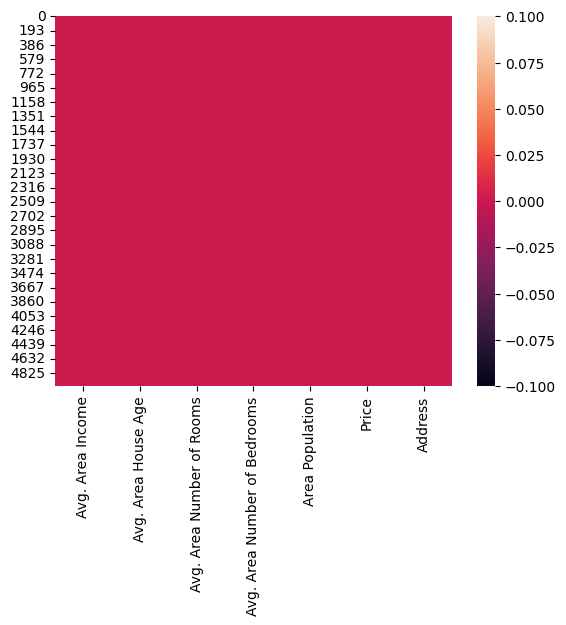

In [4]:
sns.heatmap(df.isnull())  # it is a clean data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df=df.drop('Address',axis=1)

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


<Axes: >

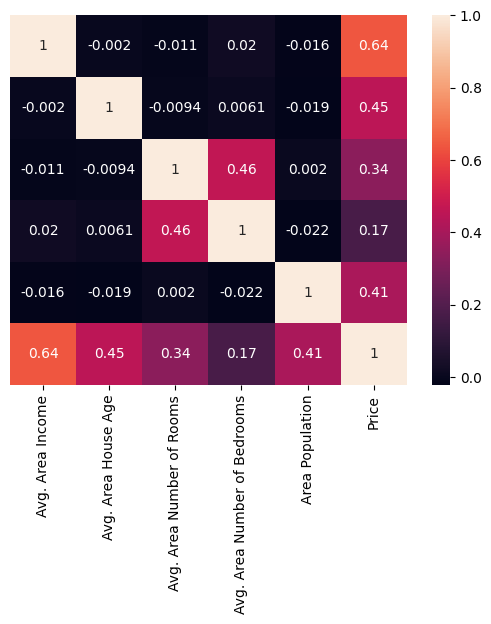

In [8]:
sns.heatmap(df.corr(),annot=True,yticklabels=False)

##### The Model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Price',axis=1)

In [11]:
y = df['Price']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [13]:
X.shape

(5000, 5)

In [14]:
y.shape

(5000,)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
predictions = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [20]:
print(mean_absolute_error(y_test,predictions))

81257.55795855941


In [21]:
print(mean_squared_error(y_test,predictions))

10169125565.897606


In [22]:
print(np.sqrt(mean_squared_error(y_test,predictions)))

100842.08231635048


In [23]:
model.coef_  # this are the values of m which is the gradient or coefficient in y = mx + c 

array([2.16176350e+01, 1.65221120e+05, 1.21405377e+05, 1.31871878e+03,
       1.52251955e+01])

In [24]:
model.intercept_  # this our intercept which is c 

-2641372.6673014294

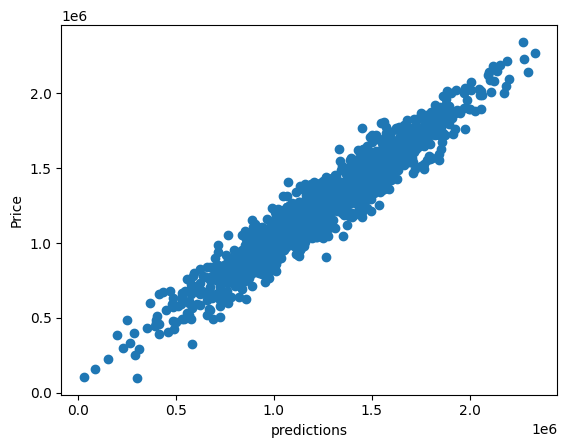

In [25]:

plt.xlabel('predictions')
plt.ylabel('Price')
plt.scatter(y_test,predictions)


#### Saving and Using the Model

In [26]:
# Saving the model
# 1. First way
import pickle 

with open('model_pickle','wb') as f:
    pickle.dump(model,f)



In [27]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [28]:
y_test.head()

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
Name: Price, dtype: float64

In [29]:
1.251689e+06  # the actual true value

1251689.0

In [30]:
X_test.head() # the test data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327
2511,62184.539375,4.925758,7.427689,6.22,26008.309124
345,73643.057298,6.766853,8.337085,3.34,43152.139577
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
54,72942.705059,4.786222,7.319886,6.41,24377.909049


In [31]:
input_data = [[66774.995817, 5.717143, 7.795215	, 4.32, 36788.980327]] # these are  the values at line 1718


In [32]:
predictions = mp.predict(input_data) # predictions of my saved model

/home/omo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:

print(predictions)  # the model prediction

[1258934.88361081]


In [34]:
# 2. Second way 
import joblib
joblib.dump(model,'joblib_model')
jm = joblib.load('joblib_model')

In [35]:
predictions_jm = jm.predict(input_data)

/home/omo/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
predictions_jm

array([1258934.88361081])